# CRIME DATA ANALYSIS

In [1]:
# importing the packages--
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/ASSIGNMENTS/Day 27 - 11th June/Assignments/Clustering/Assignment 1/crime_data.csv")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

  Unnamed: 0  Murder  Assault  UrbanPop  Rape
0    Alabama    13.2      236        58  21.2
1     Alaska    10.0      263        48  44.5


In [4]:
# copying the data--
data.copy()
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
# data analysis--
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
# checking the missing values--
data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [9]:
data.shape

(50, 5)

In [10]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


# Exploratory Data Analysis

<Axes: >

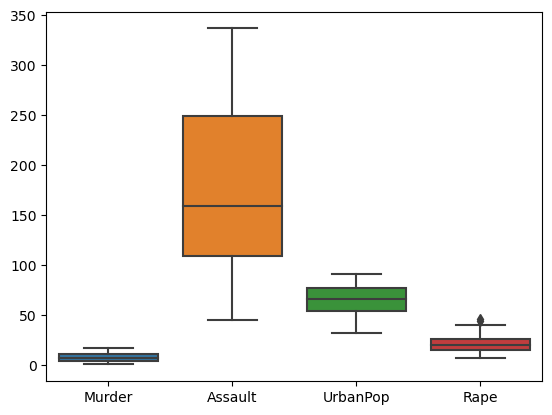

In [11]:
# checking the outliers--
sns.boxplot(data)

<Axes: xlabel='Rape', ylabel='Density'>

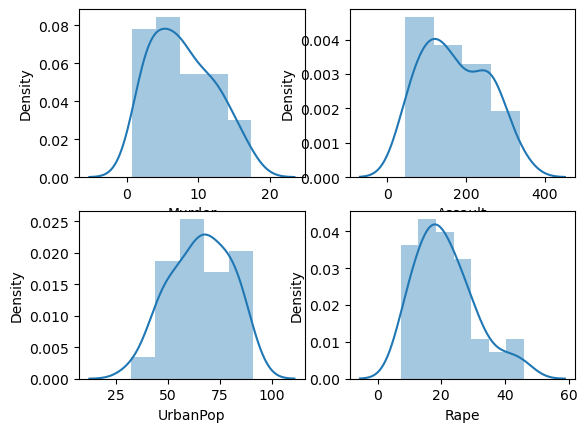

In [12]:
plt.subplot(221)
sns.distplot(data['Murder'])
plt.subplot(222)
sns.distplot(data['Assault'])
plt.subplot(223)
sns.distplot(data['UrbanPop'])
plt.subplot(224)
sns.distplot(data['Rape'])

array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

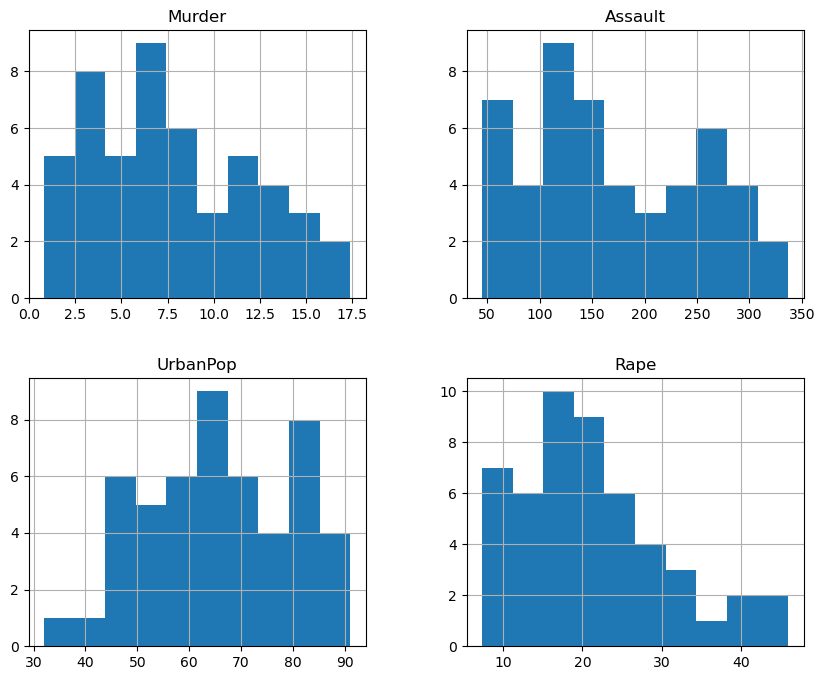

In [12]:
data.hist(figsize=(10,8), bins=10)

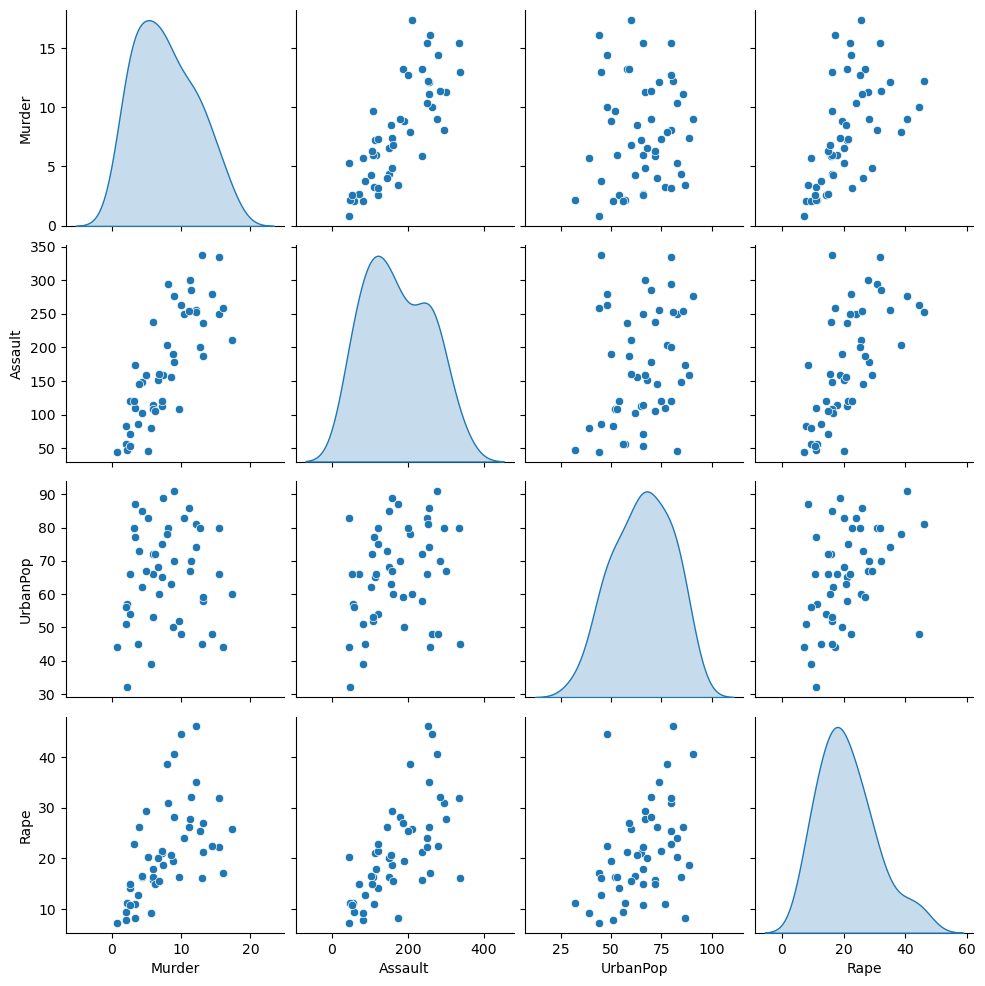

In [17]:
sns.pairplot(data, diag_kind='kde')

Text(0.5, 1.0, 'Murder vs UrbanPop')

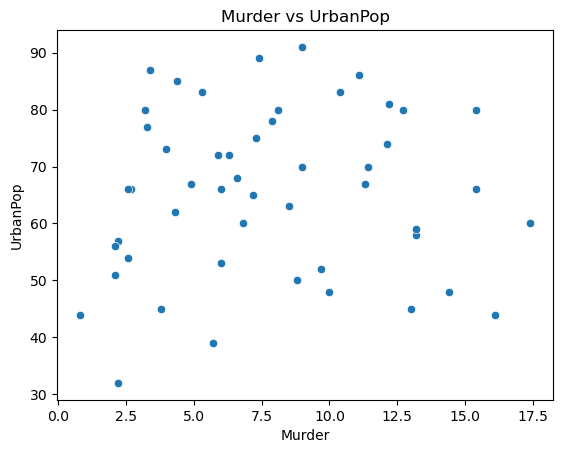

In [18]:
sns.scatterplot(data=data, x='Murder', y='UrbanPop')
plt.title('Murder vs UrbanPop')

Text(0.5, 1.0, 'Murder vs Rape')

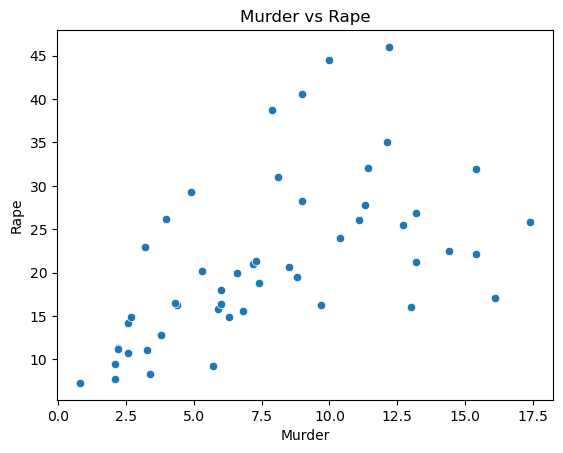

In [19]:
sns.scatterplot(data=data, x='Murder', y='Rape')
plt.title('Murder vs Rape')

Text(0.5, 1.0, 'Murder vs Assault')

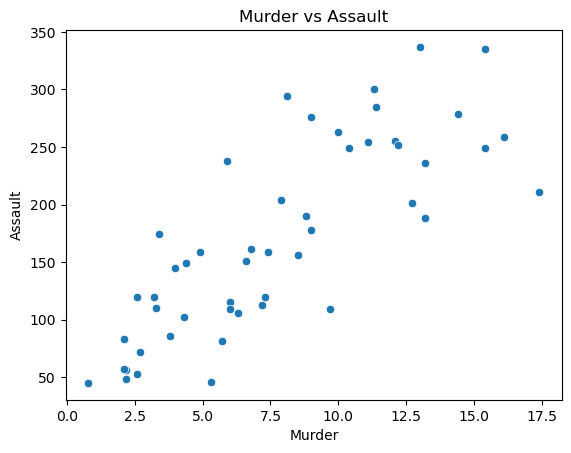

In [20]:
sns.scatterplot(data=data, x='Murder', y='Assault')
plt.title('Murder vs Assault')

Text(0.5, 1.0, 'Rape vs UrbanPop')

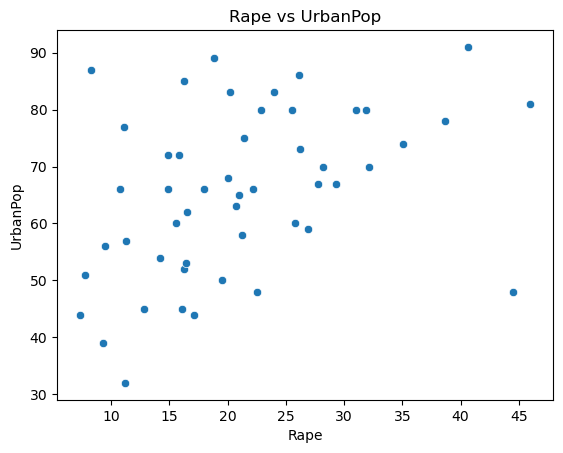

In [21]:
sns.scatterplot(data=data, x='Rape', y='UrbanPop')
plt.title('Rape vs UrbanPop')

Text(0.5, 1.0, 'Assault vs UrbanPop')

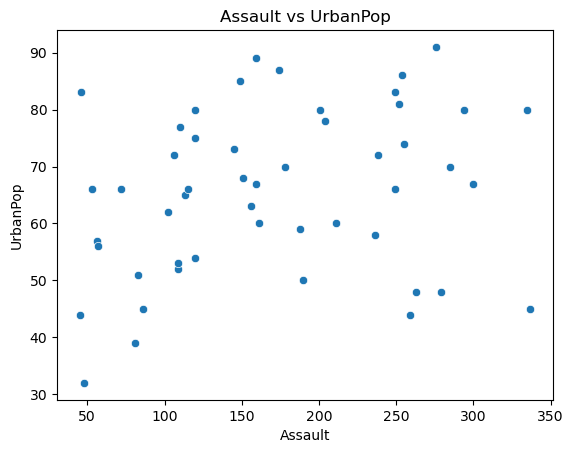

In [22]:
sns.scatterplot(data=data, x='Assault', y='UrbanPop')
plt.title('Assault vs UrbanPop')

Text(0.5, 1.0, 'Assault vs Rape')

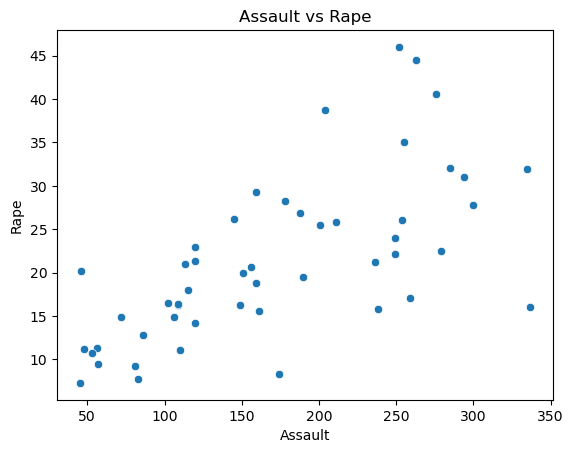

In [23]:
sns.scatterplot(data=data, x='Assault', y='Rape')
plt.title('Assault vs Rape')

In [24]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [25]:
data_norm = norm_func(data.iloc[:,1:])
data_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Hierarchical Clustering

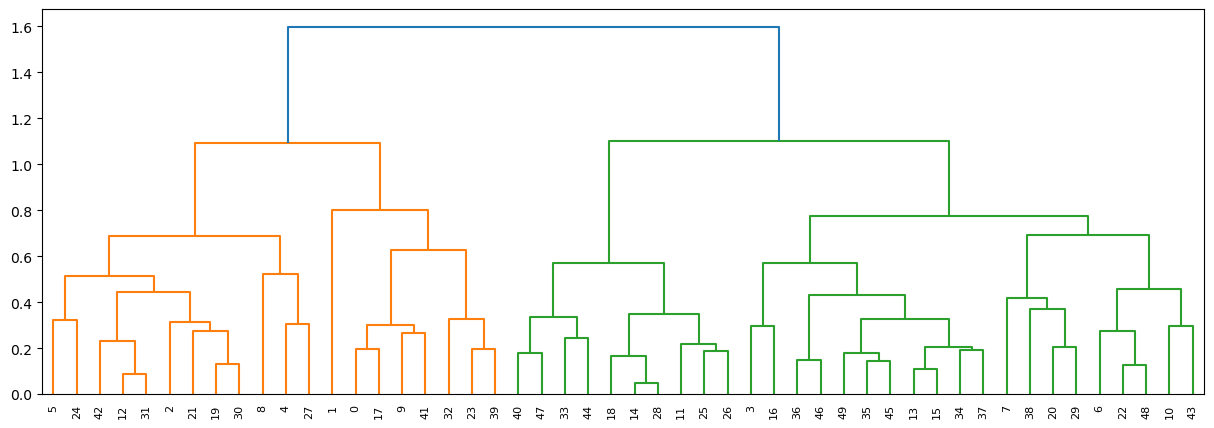

In [26]:
plt.figure(figsize=(15, 5))
dendrogram = sch.dendrogram(sch.linkage(data_norm,method = 'complete'))

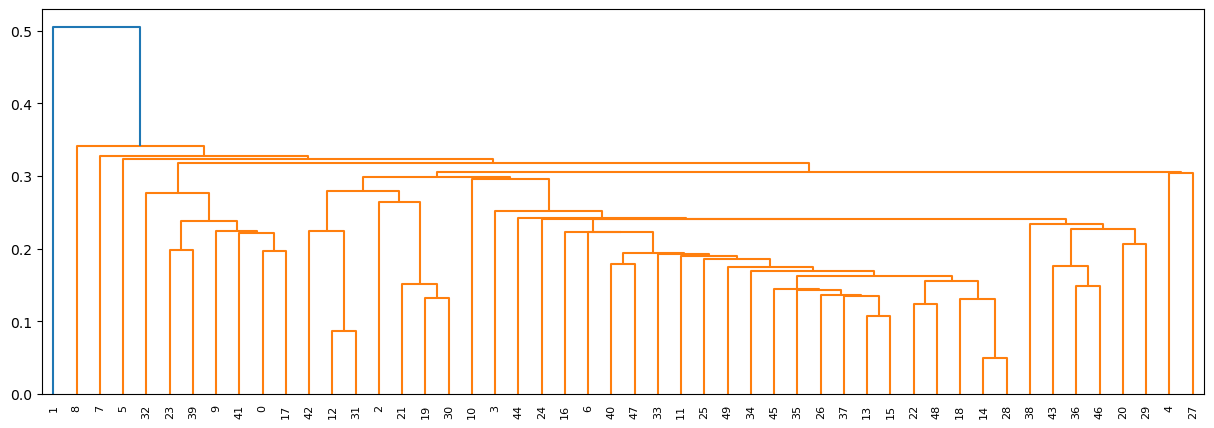

In [27]:
plt.figure(figsize=(15, 5))
dendrogram = sch.dendrogram(sch.linkage(data_norm,method = 'single'))

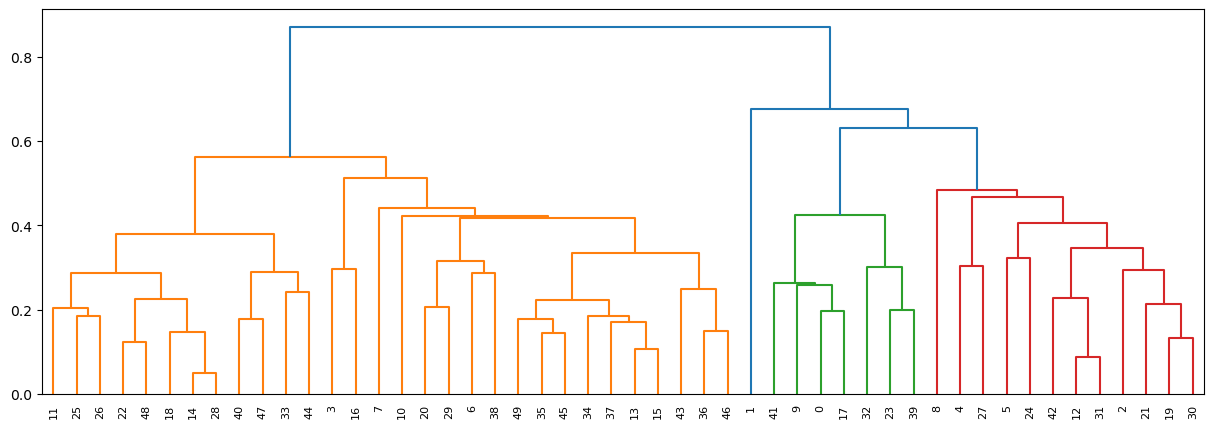

In [28]:
plt.figure(figsize=(15, 5))
dendrogram = sch.dendrogram(sch.linkage(data_norm,method = 'average'))

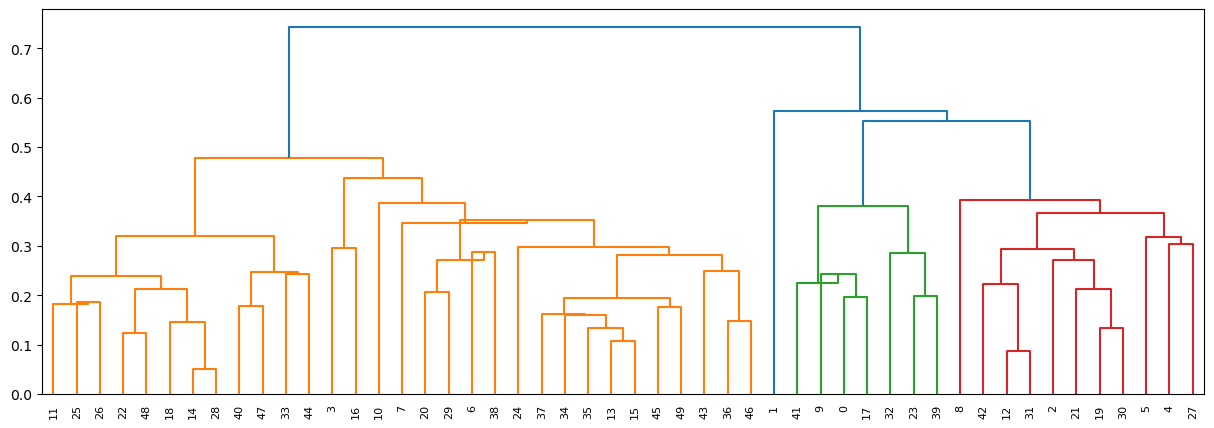

In [29]:
plt.figure(figsize=(15, 5))
dendrogram = sch.dendrogram(sch.linkage(data_norm,method = 'centroid'))

In [30]:
data['Hierarchical Cluster'] = lab

Text(0.5, 1.0, 'Hierarchical Cluster')

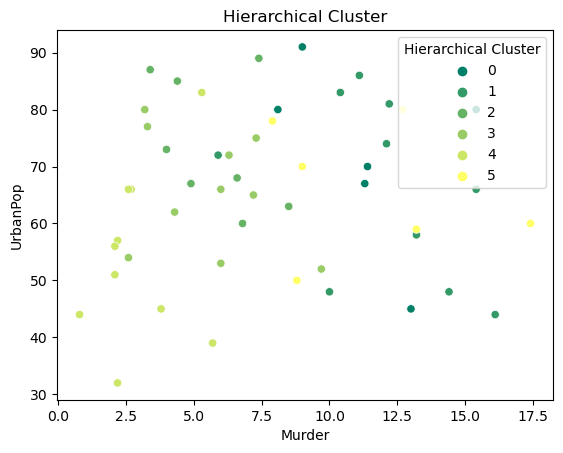

In [31]:
sns.scatterplot(x = 'Murder', y = 'UrbanPop',hue = 'Hierarchical Cluster',data = data, palette='summer')
plt.title('Hierarchical Cluster')

# Agglomerative Clustering

In [32]:
X = data[['Murder','Assault','UrbanPop','Rape']]
X.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [33]:
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
hc.fit(X)
lab = hc.labels_

In [34]:
silhouette_score(X, lab,metric='euclidean')

0.4491153735500481

In [35]:
y_hc = hc.fit_predict(data_norm)
cluster = pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([3, 5, 2, 4, 2, 2, 1, 1, 2, 3, 1, 0, 2, 4, 0, 4, 4, 3, 0, 2, 1, 2,
       0, 3, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0, 4, 4, 1, 4, 1, 3, 0, 3, 2, 1,
       0, 4, 1, 0, 0, 4], dtype=int64)

In [36]:
cluster

,Clusters
0,3
1,5
2,2
3,4
4,2
5,2
6,1
7,1
8,2
9,3


In [37]:
data['Clusterid'] = hc.labels_
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical Cluster,Clusterid
0,Alabama,13.2,236,58,21.2,1,3
1,Alaska,10.0,263,48,44.5,1,5
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,5,4
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,5,2
6,Connecticut,3.3,110,77,11.1,3,1
7,Delaware,5.9,238,72,15.8,1,1
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,5,3


In [38]:
data.iloc[:,1:].groupby(data.Clusterid).mean()

,Murder,Assault,UrbanPop,Rape,Hierarchical Cluster,Clusterid
Clusterid,,,,,,
0,3.091667,76.000000,52.083333,11.833333,3.750000,0.0
1,4.644444,144.444444,79.222222,18.766667,2.333333,1.0
2,10.883333,256.916667,78.333333,32.250000,1.583333,2.0
3,14.671429,251.285714,54.285714,21.685714,2.000000,3.0
4,7.466667,135.666667,63.444444,18.600000,2.888889,4.0
5,10.000000,263.000000,48.000000,44.500000,1.000000,5.0


In [39]:
data['Hierarchical Cluster'] = lab

Text(0.5, 1.0, 'Hierarchical Cluster')

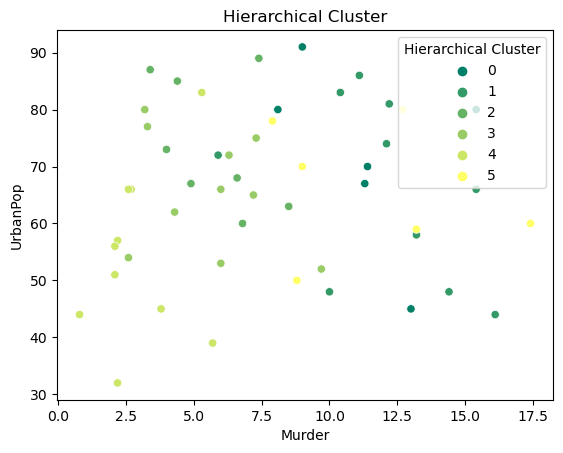

In [40]:
sns.scatterplot(x = 'Murder', y = 'UrbanPop',hue = 'Hierarchical Cluster',data = data, palette='summer')
plt.title('Hierarchical Cluster')

# K - means Clustering

In [41]:
cluster = KMeans(n_clusters=4)
cluster.fit(X)

p = cluster.predict(X)
p, len(p)

(array([1, 1, 1, 0, 1, 0, 3, 1, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 0, 1,
        2, 1, 0, 3, 3, 1, 2, 0, 1, 1, 1, 2, 3, 0, 0, 3, 0, 1, 2, 0, 0, 3,
        2, 0, 0, 2, 2, 0]),
 50)

In [42]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [43]:
df_norm = norm_func(data.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape,Hierarchical Cluster,Clusterid
0,0.746988,0.654110,0.440678,0.359173,0.2,0.6
1,0.554217,0.746575,0.271186,0.961240,0.2,1.0
2,0.439759,0.852740,0.813559,0.612403,0.0,0.4
3,0.481928,0.496575,0.305085,0.315245,1.0,0.8
4,0.493976,0.791096,1.000000,0.860465,0.0,0.4
5,0.427711,0.544521,0.779661,0.811370,1.0,0.4
6,0.150602,0.222603,0.762712,0.098191,0.6,0.2
7,0.307229,0.660959,0.677966,0.219638,0.2,0.2
8,0.879518,0.993151,0.813559,0.635659,0.0,0.4
9,1.000000,0.568493,0.474576,0.478036,1.0,0.6


Text(0, 0.5, 'WCSS')

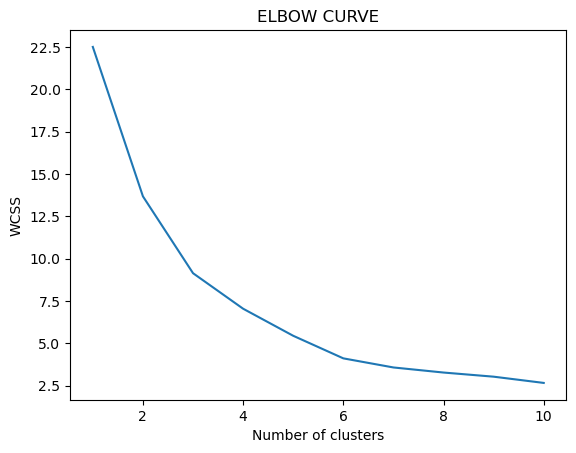

In [44]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,random_state= 0)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("ELBOW CURVE")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [45]:
model = KMeans(n_clusters = 4)
model.fit(df_norm)
model.labels_

array([2, 2, 2, 3, 2, 3, 0, 0, 2, 3, 0, 1, 2, 3, 1, 3, 3, 2, 1, 2, 0, 2,
       1, 2, 3, 1, 1, 2, 1, 0, 2, 2, 2, 1, 3, 3, 0, 3, 0, 2, 1, 3, 3, 0,
       1, 3, 0, 1, 1, 3])

In [46]:
md = pd.Series(model.labels_)
data['clusterid']=md
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical Cluster,Clusterid,clusterid
0,Alabama,13.2,236,58,21.2,1,3,2
1,Alaska,10.0,263,48,44.5,1,5,2
2,Arizona,8.1,294,80,31.0,0,2,2
3,Arkansas,8.8,190,50,19.5,5,4,3
4,California,9.0,276,91,40.6,0,2,2
5,Colorado,7.9,204,78,38.7,5,2,3
6,Connecticut,3.3,110,77,11.1,3,1,0
7,Delaware,5.9,238,72,15.8,1,1,0
8,Florida,15.4,335,80,31.9,0,2,2
9,Georgia,17.4,211,60,25.8,5,3,3


In [47]:
data.iloc[:,1:].groupby(data.clusterid).mean()

,Murder,Assault,UrbanPop,Rape,Hierarchical Cluster,Clusterid,clusterid
clusterid,,,,,,,
0,4.644444,144.444444,79.222222,18.766667,2.333333,1.000000,0.0
1,3.091667,76.000000,52.083333,11.833333,3.750000,0.000000,1.0
2,12.206667,274.866667,68.066667,29.213333,0.600000,2.533333,2.0
3,9.100000,157.357143,65.571429,22.321429,3.642857,3.428571,3.0


In [48]:
data['Cluster'] = p
print(data.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape  Hierarchical Cluster  \
0     Alabama    13.2      236        58  21.2                     1   
1      Alaska    10.0      263        48  44.5                     1   
2     Arizona     8.1      294        80  31.0                     0   
3    Arkansas     8.8      190        50  19.5                     5   
4  California     9.0      276        91  40.6                     0   

   Clusterid  clusterid  Cluster  
0          3          2        1  
1          5          2        1  
2          2          2        1  
3          4          3        0  
4          2          2        1  


Text(0.5, 1.0, 'K-means Clustering')

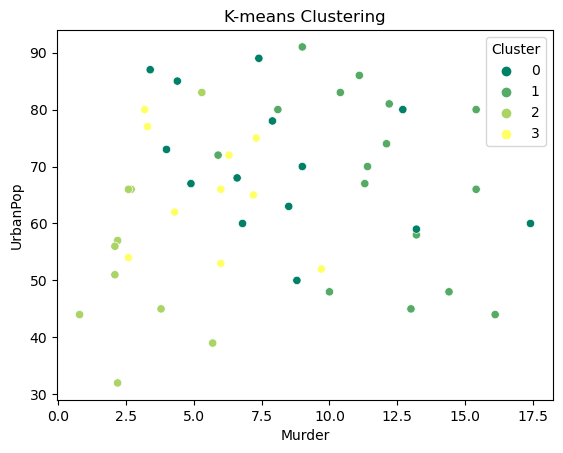

In [49]:
sns.scatterplot(x = 'Murder',y = 'UrbanPop',hue = 'Cluster',data = data, palette='summer')
plt.title('K-means Clustering')

In [50]:
print(data['Cluster'].value_counts(normalize=True)*100)

1    32.0
0    28.0
3    20.0
2    20.0
Name: Cluster, dtype: float64


In [51]:
labels = cluster.labels_
silhouette_score(X, labels,metric='euclidean')

0.5012332370891494

In [52]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [53]:
cluster = KMeans(n_clusters=4)
cluster.fit(X_scaled)

p1 = cluster.predict(X_scaled)
p1, len(p1)

(array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
        1, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
        1, 2, 2, 1, 1, 2]),
 50)

In [70]:
labels = cluster.labels_
silhouette_score(X_scaled, labels,metric='euclidean')

0.33968891433344395